## Analysing Trends and Volatility Patterns in Currency Exchange Data

This project is structured as follows:
1. Data Collection and Preprocessing
2. Analysing Recent Market Behaviour
  *   2.1. Time Series Visualisation
  *   2.2. Descriptive Statistics and Daily Returns Magnitude and Distribution
3. Volatility Analysis
  *   3.1. Rolling Volatility Time Series
  *   3.2. Comparing Volatility Trends on a Quarterly and Yearly Basis
4. Key Insights



### Library Install

In [1]:
pip install yfinance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import yfinance as yf

### 1. Data Collection and Preprocessing
Here we collecthistorical exchange rate data for the selected currency pairs.

Currency pairs:
- EUR/GBP
- USD/JPY
- AUD/JPY
- USD/EUR



In [3]:
# collect exchange rate data for the selected currency pairs since the start of 2018
current_date = pd.to_datetime('today')

eur_gbp = yf.download('EURGBP=X', start = '2017-12-31', end = current_date)
usd_jpy = yf.download('JPY=X', start = '2017-12-31', end = current_date)
aud_jpy = yf.download('AUDJPY=X', start = '2017-12-31', end = current_date)
usd_eur = yf.download('EUR=X', start = '2017-12-31', end = current_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


##### Data Cleaning and Preprocessing
- Check for and handle missing data points
- Verify data types for each column and convert to appropriate types if needed
- Check that all dataframes are sorted chronologically

In [4]:
# Drop 'Volume' column which is not required
# Check all other columns for missing values

currency_pairs = {
    "EUR/GBP":eur_gbp,
    "USD/JPY":usd_jpy,
    "AUD/JPY":aud_jpy,
    "USD/EUR":usd_eur,
}

for pair, df in currency_pairs.items():
  df.drop(columns=['Volume'], inplace = True)
  missing_values = df.isnull().sum()
  print(f'Missing values in {pair} dataframe: \n {missing_values}')
  print()

Missing values in EUR/GBP dataframe: 
 Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

Missing values in USD/JPY dataframe: 
 Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

Missing values in AUD/JPY dataframe: 
 Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

Missing values in USD/EUR dataframe: 
 Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64



There are no missing values across the four dataframes in each column.

In [5]:
for pair, df in currency_pairs.items():
  print(f'Date     {df.index.dtype}')
  print(f'{df.dtypes}\n')

Date     datetime64[ns]
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
dtype: object

Date     datetime64[ns]
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
dtype: object

Date     datetime64[ns]
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
dtype: object

Date     datetime64[ns]
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
dtype: object



All columns have the correct data type.

In [6]:
for pair, df in currency_pairs.items():
  if df.index.is_monotonic_increasing:
    print(f'{pair} is sorted in ascending order.')

EUR/GBP is sorted in ascending order.
USD/JPY is sorted in ascending order.
AUD/JPY is sorted in ascending order.
USD/EUR is sorted in ascending order.


### 2. Analysing Recent Market Behaviour - Daily Returns and Adjusted Close Prices

In this section, we consider the last 2 years of data, allowing us to capture recent market dynamics that are most pertinent to current conditions. This approach provides us with insights that are highly relevant for day-to-day risk analysis.

#### 2.1. Time Series Visualisation

Here our visualisation approach involves plotting both daily returns and actual adjusted close values on separate graphs for each currency pair. To enhance clarity, we apply a 20-day Moving Average (MA) as a smoothing technique. We've chosen the MA over the Exponential Moving Average (EMA) due to its effectiveness in reducing noise and better reflecting the general behavior of the time series. This choice is particularly valuable when dealing with shorter time frames and significant outliers, ensuring a more accurate representation of the underlying trend.

In [7]:
# calculate daily returns and volatility for each pair
# drop na value

rolling_window = 30

for idx, df in enumerate(currency_pairs.values()):
    df['Daily_Return'] = df['Adj Close'].pct_change()
    df.dropna(inplace=True)
    df['Rolling_Volatility'] = df['Daily_Return'].rolling(window=rolling_window).std()

In [8]:
# create dataframes for currency pairs from the last 2 years
start_date_2yrs = current_date - pd.DateOffset(years=2)

eur_gbp_2yr = eur_gbp.loc[eur_gbp.index >= start_date_2yrs]
usd_jpy_2yr = usd_jpy.loc[usd_jpy.index >= start_date_2yrs]
aud_jpy_2yr = aud_jpy.loc[aud_jpy.index >= start_date_2yrs]
usd_eur_2yr = usd_eur.loc[usd_eur.index >= start_date_2yrs]

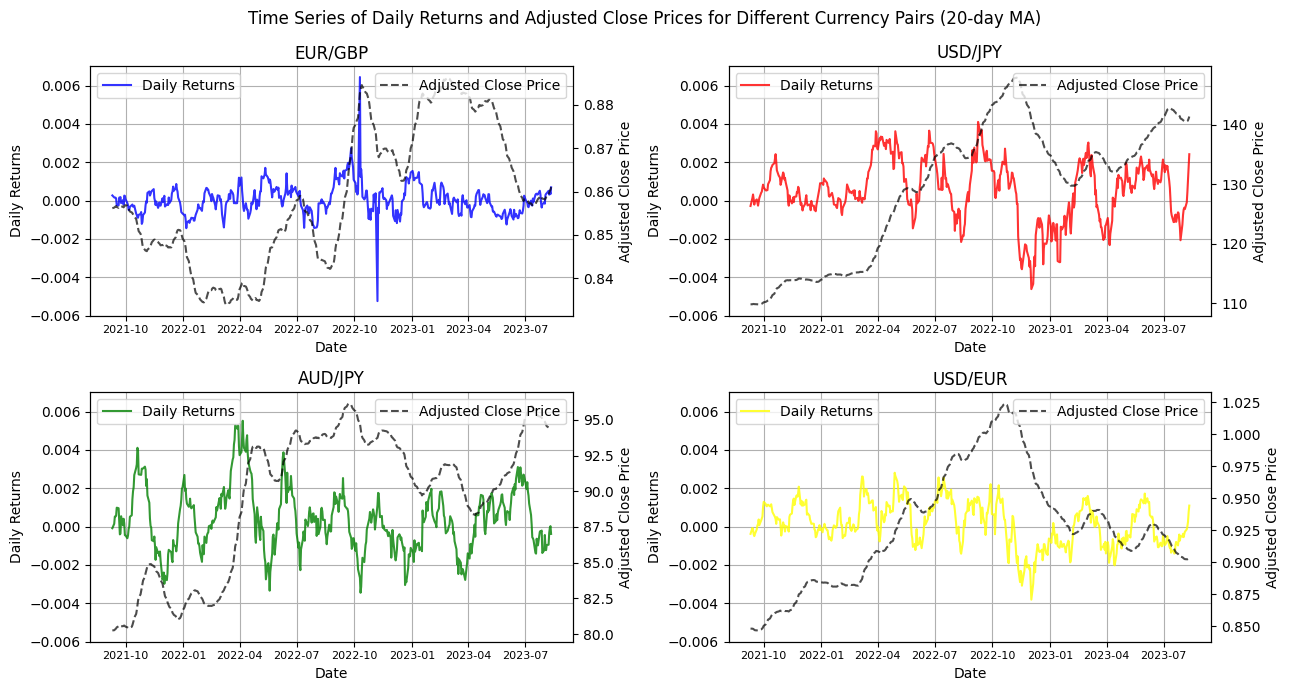

In [9]:
# create time series plots of daily returns for each currency pair

colors=['blue', 'red', 'green','yellow']
labels=['EUR/GBP','USD/JPY','AUD/JPY','USD/EUR']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13,7))
fig.suptitle('Time Series of Daily Returns and Adjusted Close Prices for Different Currency Pairs (20-day MA)')

for idx, df in enumerate([eur_gbp_2yr.copy(), usd_jpy_2yr.copy(), aud_jpy_2yr.copy(), usd_eur_2yr.copy()]):
  row = idx // 2
  col = idx % 2
  ax1 = axs[row,col]

  df['MA_Daily_Return'] = df.Daily_Return.rolling(window=20).mean()

  ax1.plot(df.index, df.MA_Daily_Return, label='Daily Returns', color=colors[idx], alpha=0.8)
  ax1.set_xlabel('Date')
  ax1.xaxis.set_tick_params(labelsize=8)
  ax1.set_ylabel('Daily Returns')
  ax1.set_ylim(-0.006,0.007)
  ax1.set_title(labels[idx], fontsize=12)
  ax1.legend(loc='upper left')

  ax1.grid(True)

  # secondary axis, share the same x axis
  ax2 = ax1.twinx()

  df['MA_Adj_Close'] = df['Adj Close'].rolling(window=20).mean()

  ax2.plot(df.index, df.MA_Adj_Close, label='Adjusted Close Price', color='black', linestyle='--', alpha=0.7)

  ax2.set_ylabel('Adjusted Close Price')
  ax2.legend(loc='upper right')


plt.tight_layout()
plt.show()

In [10]:
eur_gbp.loc[(eur_gbp.Daily_Return >0.1)|(eur_gbp.Daily_Return<-0.1)]

,Open,High,Low,Close,Adj Close,Daily_Return,Rolling_Volatility
Date,,,,,,,
2022-10-10,0.87860,0.88119,0.87690,0.97900,0.97900,0.116407,0.022344
2022-10-11,0.87658,0.88054,0.87249,0.87658,0.87658,-0.104617,0.029991


Insights:

- The **EUR/GBP** exchange rate displayed relatively low volatility throughout the observed period, with a few notable exceptions. On October 10 2022, the exchange rate experienced a sharp increase of 11.6%, which was an anomalous event. This event could have been caused by a number of factors, including the ECB's surprise interest rate hike and the UK government's announcement of a snap election. The adjusted close price showed an unsteady upward trend, with a recent decline in the last few months.

- The **USD/JPY** exchange rate experienced extended positive daily return phases between October 2021 and November 2022, followed by a shorter period of negative returns. The recent six-month period has predominantly seen positive returns. The adjusted close price exhibited an upward trend, reaching its peak in late 2022. This trend is likely due to the Federal Reserve's aggressive monetary policy tightening in response to rising inflation.

- The **AUD/JPY** exchange rate displayed recurring cycles of positive daily returns, with higher magnitudes than its peers. Periods of positive returns alternated with shorter negative return phases. The adjusted close price trended upward from September 2021 to July 2023. This trend is likely due to the fact that Australia is a commodity exporter, and the strength of the AUD is often correlated with the price of commodities.

- The **USD/EUR** exchange rate showed strong correlation with USD/JPY in terms of trends, indicating shared market influences within the USD exchange market. Both currencies experienced extended positive daily return phases between October 2021 and November 2022, followed by a shorter period of negative returns. Recent fluctuations between positives and negatives were noted for USD/EUR. The adjusted close price of both currencies peaked in late 2022, but USD/EUR declined more sharply in the following months. This could be due to a number of factors, such as the ongoing war in Ukraine and the threat of a recession in the eurozone.


Notably, the outlier event on October 10 2022, substantially impacted EUR/GBP's volatility. While this value is retained in the visualisation analysis, its effect on the volatility metric is subsequently managed through outlier handling techniques in Section 3.

Overall, the insights from this analysis suggest that the EUR/GBP exchange rate is relatively stable, but it is subject to occasional volatility. The USD/JPY and AUD/JPY exchange rates are more volatile, but they have also experienced strong upward trends in recent months. The USD/EUR exchange rate is closely correlated with USD/JPY, with USD/JPY being relatively more volatile.

#### 2.2 Descriptive Statistics and Daily Returns Magnitude and Distribution

Here we calculate descriptive statistics and present a bar chart that highlights the distribution of positive, negative, and neutral daily returns, categorised by the magnitude of these returns.  Instead of smoothed values, we utilise actual data points. This approach allows us to gain a more nuanced understanding of the behavior of currency pairs beyond the visualisations provided earlier.

In [11]:
# calculate descriptive statistics and store in a dataframe

desc_stats = {
    "EUR/GBP": {},
    "USD/JPY": {},
    "AUD/JPY": {},
    "USD/EUR": {}
}

currency_pairs_2yr = [eur_gbp_2yr.copy(), usd_jpy_2yr.copy(), aud_jpy_2yr.copy(), usd_eur_2yr.copy()]

for idx, df in enumerate(currency_pairs_2yr):
    max_adj_close = df['Adj Close'].max()
    date_max_adj_close = df.loc[df['Adj Close'] == max_adj_close].index[0].strftime('%b %d %Y')
    desc_stats[labels[idx]]["maximum_adjusted_close_price"] = max_adj_close
    desc_stats[labels[idx]]["date_maximum_adjusted_close_price"] = date_max_adj_close

    min_adj_close = df['Adj Close'].min()
    date_min_adj_close = df.loc[df['Adj Close'] == min_adj_close].index[0].strftime('%b %d %Y')
    desc_stats[labels[idx]]["minimum_adjusted_close_price"] = min_adj_close
    desc_stats[labels[idx]]["date_minimum_adjusted_close_price"] = date_min_adj_close

    desc_stats[labels[idx]]["average_adjusted_close_price"] = df['Adj Close'].mean()

    max_dr = df['Daily_Return'].max()
    date_max_dr = df.loc[df['Daily_Return'] == max_dr].index[0].strftime('%b %d %Y')
    desc_stats[labels[idx]]["maximum_daily_return"] = max_dr
    desc_stats[labels[idx]]["date_maximum_daily_return"] = date_max_dr

    min_dr = df['Daily_Return'].min()
    date_min_dr = df.loc[df['Daily_Return'] == min_dr].index[0].strftime('%b %d %Y')
    desc_stats[labels[idx]]["minimum_daily_return"] = min_dr
    desc_stats[labels[idx]]["date_minimum_daily_return"] = date_min_dr

    avg_dr_positive = df['Daily_Return'].loc[df['Daily_Return'] > 0].mean()
    desc_stats[labels[idx]]["average_positive_daily_return"] = avg_dr_positive

    avg_dr_negative = df['Daily_Return'].loc[df['Daily_Return'] < 0].mean()
    desc_stats[labels[idx]]["average_negative_daily_return"] = avg_dr_negative

    positive_threshold = 0.0025
    negative_threshold = -0.0025

    df['Return_Category'] = "Neutral"
    df.loc[df['Daily_Return'] >= positive_threshold, 'Return_Category'] = 'Positive'
    df.loc[df['Daily_Return'] <= negative_threshold, 'Return_Category'] = 'Negative'

    positive_days = df[df['Return_Category'] == 'Positive'].shape[0]
    negative_days = df[df['Return_Category'] == 'Negative'].shape[0]
    neutral_days = df[df['Return_Category'] == "Neutral"].shape[0]

    desc_stats[labels[idx]]["total_number_of_positive_days"] = positive_days
    desc_stats[labels[idx]]["total_number_of_negative_days"] = negative_days
    desc_stats[labels[idx]]["total_number_of_neutral_days"] = neutral_days

desc_stats_df = pd.DataFrame(desc_stats)

In [12]:
# plot a bar chart of the number of positive, negative and neutral days (in terms of daily returns) and stack by magnitude of daily returns

for df in currency_pairs_2yr:
    df['Daily_Return_Type'] = pd.cut(df['Daily_Return'], bins=[-float('inf'), -0.0025, 0.0025, float('inf')],
                                     labels=['negative', 'neutral', 'positive'], right=False)

    df['Daily_Return_Magnitude'] = df.apply(lambda row: 'Neutral' if row['Daily_Return_Type'] == 'neutral' else
                                            '0.25% - 0.75%' if 0.0025 <= abs(row['Daily_Return']) < 0.0075 else
                                            '0.75% - 1.25%' if 0.0075 <= abs(row['Daily_Return']) < 0.0125 else
                                            '1.25% - 1.75%' if 0.0125 <= abs(row['Daily_Return']) < 0.0175 else
                                            '1.75% and above', axis=1)



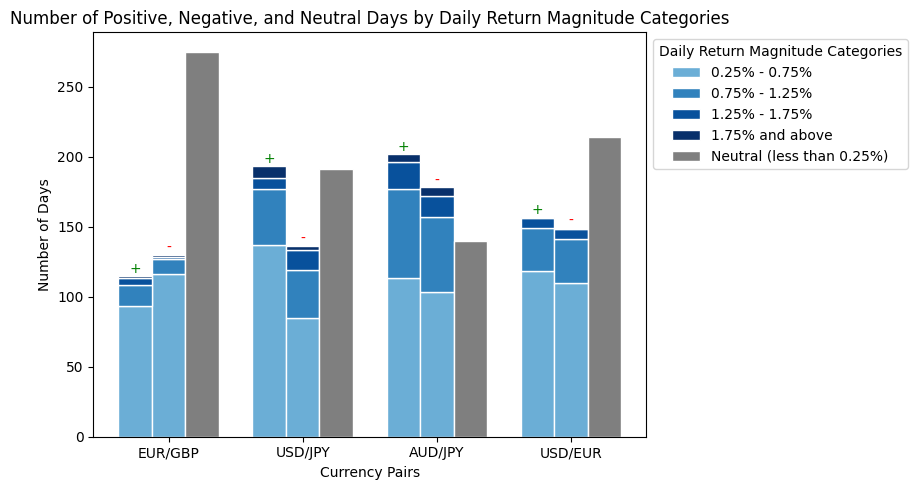


Descriptive Statistics
                                       EUR/GBP      USD/JPY      AUD/JPY      USD/EUR
maximum_adjusted_close_price             0.979   150.175995    98.287003      1.04208
date_maximum_adjusted_close_price  Oct 10 2022  Oct 21 2022  Sep 13 2022  Sep 28 2022
minimum_adjusted_close_price           0.82292   109.149002    78.379997      0.84133
date_minimum_adjusted_close_price  Mar 07 2022  Sep 22 2021  Aug 23 2021  Sep 06 2021
average_adjusted_close_price          0.858674   129.239862    89.543976     0.925723
maximum_daily_return                  0.116407     0.025344     0.023687     0.017685
date_maximum_daily_return          Oct 10 2022  Feb 06 2023  Mar 23 2022  Mar 07 2022
minimum_daily_return                 -0.104617     -0.03725    -0.039571    -0.018047
date_minimum_daily_return          Oct 11 2022  Dec 21 2022  Dec 21 2022  Nov 07 2022
average_positive_daily_return         0.003646     0.004691     0.005911     0.004131
average_negative_daily_return 

In [13]:
magnitude_categories = ['0.25% - 0.75%', '0.75% - 1.25%', '1.25% - 1.75%', '1.75% and above']

positive_counts = np.zeros((len(currency_pairs_2yr), len(magnitude_categories)), dtype=int)
negative_counts = np.zeros((len(currency_pairs_2yr), len(magnitude_categories)), dtype=int)
neutral_counts = np.zeros(len(currency_pairs_2yr), dtype=int)

# get data for each Daily Return type and magnitude category
for idx, df in enumerate(currency_pairs_2yr):
    for i, category in enumerate(magnitude_categories):
        positive_mask = (df['Daily_Return_Type'] == 'positive') & (df['Daily_Return_Magnitude'] == category)
        negative_mask = (df['Daily_Return_Type'] == 'negative') & (df['Daily_Return_Magnitude'] == category)

        positive_counts[idx, i] = np.sum(positive_mask)
        negative_counts[idx, i] = np.sum(negative_mask)

    neutral_mask = df['Daily_Return_Type'] == 'neutral'
    neutral_counts[idx] = np.sum(neutral_mask)

x = np.arange(len(labels))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(9,5))

colours = ['#6BAED6','#3182BD','#08519C', '#08306B']

# stack bars by magnitude category
for i in range(len(magnitude_categories)):
    bottom_positive = np.sum(positive_counts[:, :i], axis=1)
    bottom_negative = np.sum(negative_counts[:, :i], axis=1)

    ax.bar(x - bar_width, positive_counts[:, i], bar_width, bottom=bottom_positive,
           label=f'{magnitude_categories[i]}', color=colours[i], edgecolor='white')
    ax.bar(x, negative_counts[:, i], bar_width, bottom=bottom_negative,
           color=colours[i], edgecolor='white')

# label the positive and negative bars
for i, currency_pair in enumerate(labels):
    ax.text(x[i] - bar_width, np.sum(positive_counts[i]), '+', ha='center', va='bottom', color='green')
    ax.text(x[i], np.sum(negative_counts[i]), '-', ha='center', va='bottom', color='red')

ax.bar(x + bar_width, neutral_counts, bar_width, label='Neutral (less than 0.25%)', color='tab:gray', edgecolor='white')

ax.set_xlabel('Currency Pairs')
ax.set_ylabel('Number of Days')
ax.set_title('Number of Positive, Negative, and Neutral Days by Daily Return Magnitude Categories')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title='Daily Return Magnitude Categories', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


# print descriptive statistics
print('\nDescriptive Statistics')
print(desc_stats_df.to_string())

Insights:

Here we observe that EUR/GBP had the highest number of neutral days (daily returns between -0.25% and 0.25%), consistent with its overall low volatility. Interstingly, this currency pair had by far the highest maximum daily return value (and the lowest minimum), demonstrating that acute volatility is still possible during periods of overall low volatility. Conversely, AUD/JPY and USD/JPY had fewer neutral days, indicating higher volatility in the Japanese exchange market, coupled with a bias toward positive returns. Generally, positive days outnumbered negative days across currency pairs except for EUR/GBP. Although EUR/GBP had fewer positive days, it exhibited occasional higher-magnitude positive daily returns. The average positive and negative daily returns were comparable across most currency pairs. USD/JPY was the only currency pair where the average negative daily returns exceeded the average postive daily returns. This aligns with the observation that USD/JPY had sharp but infrequent negative returns. The maximum adjusted close price of all currency pairs occurred within a span of just over a month, from September 13th to October 21st, 2022. Similarly, the minimum adjusted close price spanned approximately a month, with the exception of EUR/GBP, where the minimum was observed in March 2022. These time periods could potentially be explored further for underlying factors.






### 3. Volatility Analysis

In this section, we delve into a specific volatility measure and examine trends over recent years. Our analysis uses data from the past 5 years, allowing us to uncover recurring seasonal patterns and trends across various years and quarters. For this analysis, we utilise the standard deviation of daily returns as our chosen volatility metric.

#### 3.1. Rolling Volatility Time Series

Here the graph presents the rolling volatility trends for each currency pair over time, calculated over a 30-day period.

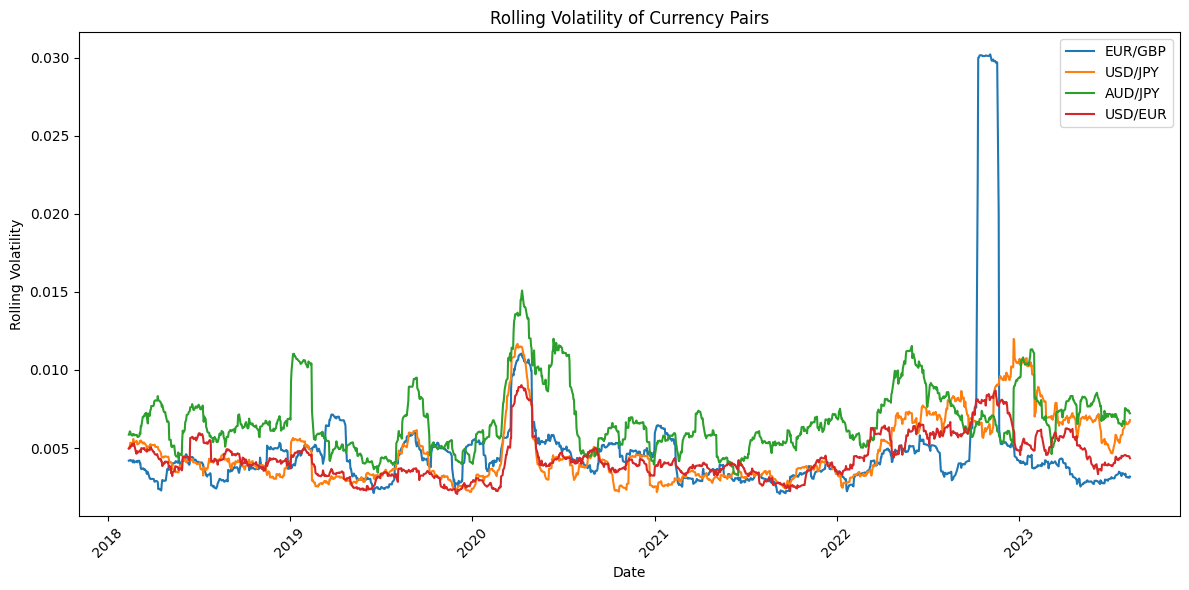

In [14]:
# Plot rolling volatility over time for each currency pair
plt.figure(figsize=(12, 6))

for idx, df in enumerate(currency_pairs.values()):
    plt.plot(df.index, df['Rolling_Volatility'], label=labels[idx])

plt.xlabel('Date')
plt.ylabel('Rolling Volatility')
plt.title('Rolling Volatility of Currency Pairs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here we observe periods of correlated volatility among the four currency pairs, notably during the spring of 2020, coinciding with the global COVID-19 pandemic. Another phase of heightened volatility is observed in the spring and summer of 2022, which seems to be ongoing. This is likely due to a number of factors, including the ongoing war in Ukraine, the threat of a recession in the US, and rising inflation. From early 2021 to the end of that year, when the global economy was recovering from the COVID-19 pandemic, there was relatively low volatility, particularly evident across all pairs except for AUD/JPY. Among the currency pairs, AUD/JPY exhibits the highest volatility. It's important to note that our previous analysis focused on the last 2 years, highlighting EUR/GBP as less volatile, except for the exceptional event in October 2022. However, by examining the last 5 years, we uncover longer-term trends, where the volatility of EUR/GBP has been comparable to its peers.

#### 3.2. Comparing Volatility Trends on a Quarterly and Yearly Basis

Here we proceed to generate graphs that allow us to compare volatility trends on both a quarterly and yearly basis. Prior to these visualisations, we address an outlier event using winsorization. This step ensures that the outlier does not excessively skew the volatility metric and disproportionately impact our analysis.

Winsorization involves the truncation of extreme values to specific percentiles. This technique is often employed when outliers significantly impact the analysis and deviate from the usual behavior. The objective is to strike a balance between addressing extreme event influences while preserving the data's authenticity and its representation of genuine market trends.

In [15]:
# Get data for the year 2022
eur_gbp_2022 = eur_gbp.loc['2022-01-01':'2022-12-31']

# Calculate mean volatility for the year 2022 before winsorization
volatility_mean_before = eur_gbp_2022['Rolling_Volatility'].mean()

# Percentiles for winsorization
lower_percentile = 1
upper_percentile = 99

# Apply winsorization to extreme events for daily returns of the entire dataset
outlier_dates = ['2022-10-10','2022-10-11']

print("Currency Pair: EUR/GBP")

for date in outlier_dates:
    daily_return_value = eur_gbp.loc[date, 'Daily_Return']
    print(f'Daily Return for {date} (before winsorization): {daily_return_value:.4f}')

    # Calculate percentiles for the entire dataset
    lower_percentile_value = np.percentile(eur_gbp['Daily_Return'], lower_percentile)
    upper_percentile_value = np.percentile(eur_gbp['Daily_Return'], upper_percentile)

    if daily_return_value > upper_percentile_value:
        eur_gbp.loc[date, 'Daily_Return'] = upper_percentile_value
    elif daily_return_value < lower_percentile_value:
        eur_gbp.loc[date, 'Daily_Return'] = lower_percentile_value
    dr_after = eur_gbp.loc[date, 'Daily_Return']
    print(f'Daily Return for {date} (after winsorization): {dr_after:.4f}')

# Recalculate rolling volatility for the entire dataset after winsorization
eur_gbp['Rolling_Volatility'] = eur_gbp['Daily_Return'].rolling(window=30).std()

# Recalculate mean volatility for the year 2022 after winsorization
volatility_mean_after = eur_gbp.loc['2022-01-01':'2022-12-31', 'Rolling_Volatility'].mean()

# Compare mean volatility before and after winsorization for the year 2022
print(f"Volatility Mean for 2022 (before winsorization): {volatility_mean_before:.4f}")
print(f"Volatility Mean for 2022 (after winsorization): {volatility_mean_after:.4f}")


Currency Pair: EUR/GBP
Daily Return for 2022-10-10 (before winsorization): 0.1164
Daily Return for 2022-10-10 (after winsorization): 0.0124
Daily Return for 2022-10-11 (before winsorization): -0.1046
Daily Return for 2022-10-11 (after winsorization): -0.0116
Volatility Mean for 2022 (before winsorization): 0.0074
Volatility Mean for 2022 (after winsorization): 0.0048


Upon applying winsorization to the outlier values, the overall volatility for the year 2022 in EUR/GBP has significantly reduced. We next visualise volatility trends on a quarterly and yearly basis. This will allow us to uncover any potential cyclic patterns and gain deeper insights into the behavior of the currency pair.

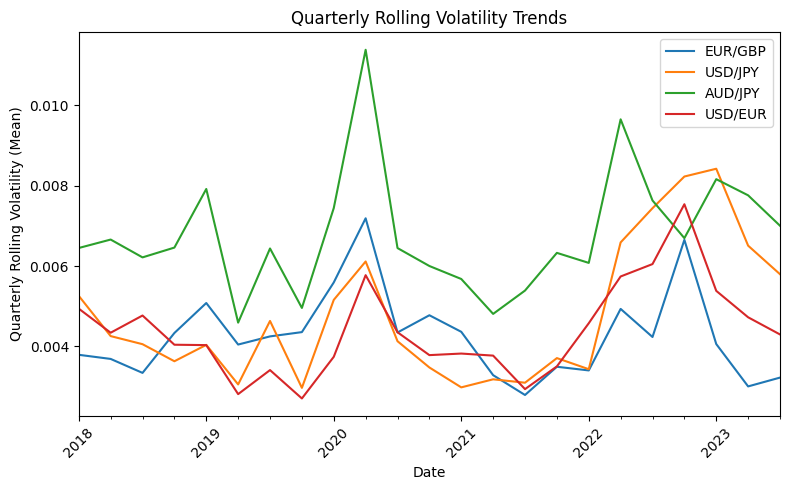

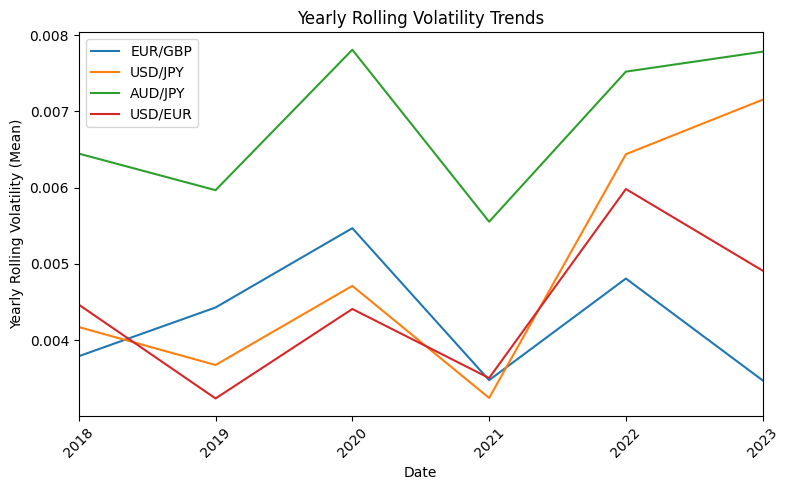

In [16]:
# Calculate quarterly rolling volatility means
quarterly_rolling_volatility = pd.concat([df['Rolling_Volatility'].resample('Q').mean() for df in currency_pairs.values()], axis=1)
quarterly_rolling_volatility.columns = labels

# Calculate yearly rolling volatility means
yearly_rolling_volatility = pd.concat([df['Rolling_Volatility'].resample('Y').mean() for df in currency_pairs.values()], axis=1)
yearly_rolling_volatility.columns = labels

# Plot quarterly rolling volatility trends
plt.figure(figsize=(8, 5))
quarterly_rolling_volatility.plot(ax=plt.gca())
plt.xlabel('Date')
plt.ylabel('Quarterly Rolling Volatility (Mean)')
plt.title('Quarterly Rolling Volatility Trends')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot yearly rolling volatility trends
plt.figure(figsize=(8, 5))
yearly_rolling_volatility.plot(ax=plt.gca())
plt.xlabel('Date')
plt.ylabel('Yearly Rolling Volatility (Mean)')
plt.title('Yearly Rolling Volatility Trends')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The most notable takeaway from the analysis of volatility on a yearly basis is that volatility tends to be cyclical. This means that a year of high volatility is usually followed by a year of low volatility. This trend is most consistent for USD/EUR, though is majoritively seen among them all. Given that we are only looking at 5 years of data, it would be useful to investigate further back to see if this trend persists further back than the beginning of 2018.

When considering a quartly basis, we can see that volatility increased among all four currency pairs in Q1 of 2020 and 2022, and decreased around Q1 of 2021 and 2023. This suggests that there is a quarterly cyclical pattern in volatility. However, it is important to note that this is just a short-term trend and it is not clear if it will persist in the long term. This warrants further investigation to see if these cyclical patterns persist when considering data from a larger timescale.



### 4. Key Insights

- Anomalies such as the sharp increase in EUR/GBP on October 10 2022, illustrate that even during low volatility periods, acute volatility events can occur.
- AUD/JPY stands out with the highest volatility among the four currency pairs analysed.
- Notable cyclical patterns in yearly and quarterly volatility trends suggest potential predictive value, warranting further analysis with a longer dataset.
- Unpredictable political and economic events significantly influence currency pair behaviors, highlighting the importance of preemptive risk management while acknowledging the potential for unexpected market shifts.

#### Conclusion
The comprehensive analysis of these currency pairs provides valuable insights into their behaviors over recent years. Volatile events, both expected and unexpected, have influenced these exchange rates. The cyclical patterns suggest the potential for predictive strategies, but further examination on a longer timeline is recommended to validate these patterns. In navigating these complexities, a prudent approach balances preparedness for anticipated events while acknowledging the uncertainty inherent in financial markets.